In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares

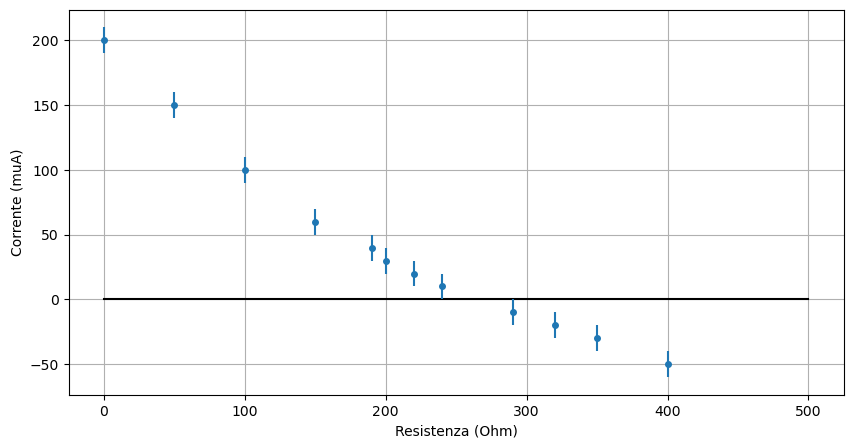

In [7]:
#Resistenze note
R1, R2 = 220, 120 #Ohm
errR1, errR2 = 1, 1 #Ohm


#dati
errR = 5 #Ohm
R = [0,50,100,150,190,200,220,240,290,320,350,400]  #Ohm
I = [0.200, 0.150,0.100,0.060,0.040,0.030,0.020,0.010,-0.010,-0.020,-0.030,-0.050] #mA
errI = [10 for i in range(len(I))] #muA
I = np.array(I)*1000 #trasforma la corrente da mA a muA
plt.figure(figsize = (10,5))
plt.plot([0,500],[0,0], color = 'black')
plt.errorbar(R, I, yerr=errI, fmt='o', markersize=4, label='Valle')
plt.xlabel("Resistenza (Ohm)")
plt.ylabel("Corrente (muA)")
plt.grid(1)



In [11]:
#Fit prendendo i punti da p a q (incluso)
def par(R,A,b):
    return A*R + b
p, q = 5, 10
Rs = np.array(R[p:q])
Is = np.array(I[p:q])
errIs = errI[p:q]
least_squares = LeastSquares(Rs, Is, errIs, par)
M = Minuit(least_squares, A = -1, b = 150)
M.migrad()
M.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.08871 (χ²/ndof = 0.0)    │              Nfcn = 60               │
│ EDM = 8.89e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   -0.42   │   0.10    │   -0.10    │    0.10    │         │         │       │
│ 1 │ b    │    111    │    26     │    -26     │     26     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           A           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.1    │    0.1    │    -26    │    26     │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────┐
│   │      A      b │
├───┼───────────────┤
│ A │ 0.0101 -2.560 │
│ b │ -2.560    670 │
└───┴───────────────┘

R3 = 268.44660194207063 +/- 11.320058073911904


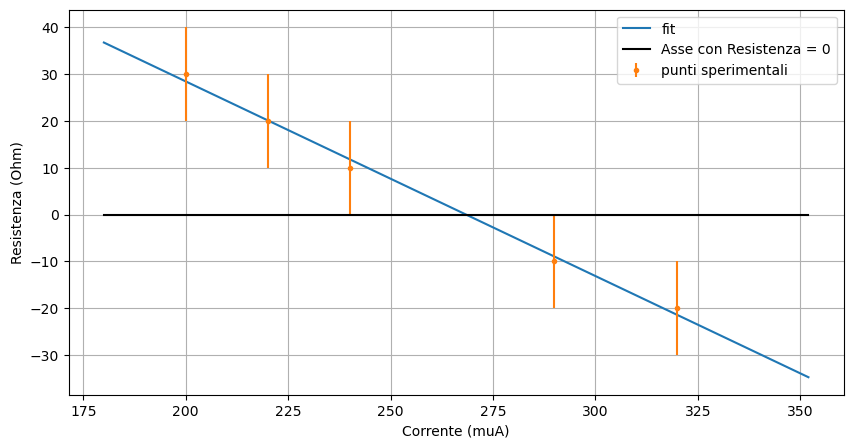

In [39]:
#Calcolo di R3
A1 = M.values['A']
b1 = M.values['b']
errA1, errb1 = M.errors['A'], M.errors['b']
covAb = M.covariance['A', 'b']

R3 = -b1/A1
pp = (1/A1**2)*(errb1**2)
sp = (b1**2/A1**4)*(errA1**2)
tp = -2*(b1/A1**3)
errR3 = (pp+sp+tp*covAb)**(0.5)
print(f"R3 = {R3} +/- {errR3}")

#Grafico fit
figm, axm = plt.subplots(figsize = (10, 5))
x = np.array([Rs[0]*0.9,Rs[-1]*1.1])
axm.plot(x, par(x,A1,b1), label = "fit")
axm.errorbar(Rs, Is, fmt = 'o', markersize = 3, yerr=errIs, label = "punti sperimentali")
axm.set_xlabel("Corrente (muA)")
axm.set_ylabel("Resistenza (Ohm)")
axm.plot(x,[0,0], color = 'black', label = "Asse con Resistenza = 0")
axm.legend()
axm.grid(1)


In [201]:
#Stima di Rx
Rx = (R1/R2)*R3
errRx = Rx*(((errR1/R1)**2+(errR2/R2)**2+(errR3/R3)**2)**(0.5))
print(f"Rx = {Rx} +/- {errRx}")

Rx = 492.1521035604628 +/- 21.272754267318867
